<a href="https://colab.research.google.com/github/Henriquerezer/FLAI-Cursos/blob/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# bibliotecas padrão 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# código para permitir acesso ao meu google drive, assim poderei importar os dados, sem precisar fazer upload
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
caminho = '/content/gdrive/MyDrive/Colab_Notebooks/FLAI/Rafinha dos dados/Classificação/Dados/gaussian_nb.csv'
data = pd.read_csv(caminho)
data

,age,y
0,56,0
1,57,0
2,37,0
3,40,0
4,56,0
...,...,...
41183,73,1
41184,46,0
41185,56,0
41186,44,1


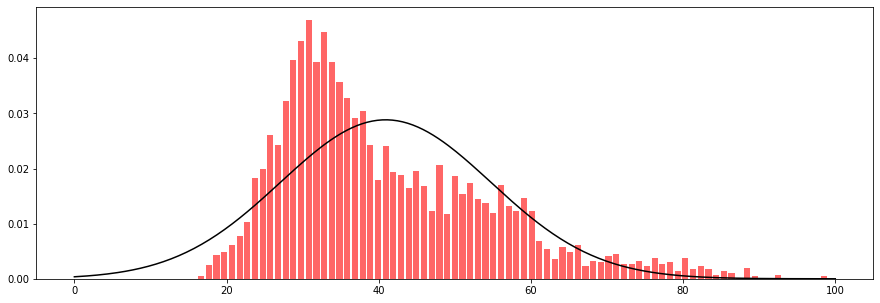

In [ ]:
# Hipótese extra no gaussian Naive Bayes

media_1 = data.loc[data.y==1].age.mean()
std_1 = data.loc[data.y==1].age.std()

plt.figure(figsize=(15,5))
plt.hist(data.loc[data.y==1].age, rwidth = 0.8, bins = np.linspace(0,100,100), color = 'r', density=True, alpha=0.6)

from scipy.stats import norm
x = np.linspace(0,100,300)
plt.plot(x, norm.pdf(x,media_1, std_1), 'k-')

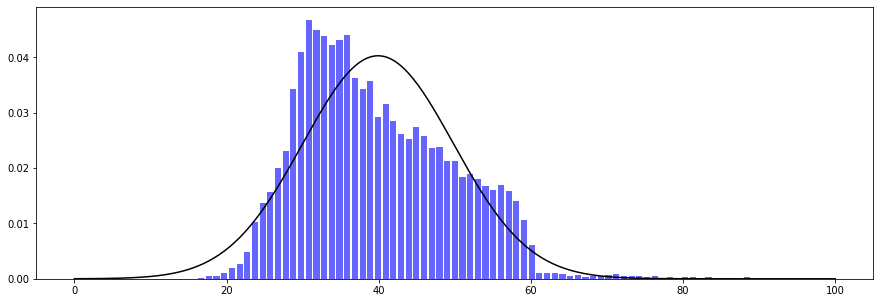

In [ ]:
# Hipótese extra no gaussian Naive Bayes

media_0 = data.loc[data.y==0].age.mean()
std_0 = data.loc[data.y==0].age.std()

plt.figure(figsize=(15,5))
plt.hist(data.loc[data.y==0].age, rwidth = 0.8, bins = np.linspace(0,100,100), color = 'blue',density=True, alpha=0.6)

from scipy.stats import norm
x = np.linspace(0,100,300)
plt.plot(x, norm.pdf(x,media_0, std_0), 'k-')

In [ ]:
# Probabilidade para idade de 30 anos e y  = 0 
norm.pdf(30, media_0, std_0)

0.024413861387616222

In [ ]:
## Probabilidade para idade de 70 anos e y  = 1
norm.pdf(70, media_1, std_1) 

0.0031650267052752493

In [ ]:
#COM O MODELO
#fonte: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(data[['age']], data.y)

GaussianNB()

In [ ]:
para_predizer = pd.DataFrame([30], columns=['age'])
para_predizer

,age
0,30


In [ ]:
gnb.predict_proba(para_predizer)

array([[0.90101764, 0.09898236]])